## Step 1 : Load Libraries

In [73]:
## Load Libraries
#
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

## Step 2 : Load Dataset

In [74]:
dataset = pd.read_excel("Dataset/Sample.xlsx")
dataset.head()

,S. No.,Spec #,Spec Name,Para,Sub Section Heading,Submittal Type,Submittal Description,Target Date,Subcontractor
0,220,03 10 00,CONCRETE FORMWORK,1.8-A,SUBMITTALS,Manufacturers Instructions,Where the SUBMITTALS section of this specifica...,NaN,NaN
1,221,03 10 00,CONCRETE FORMWORK,1.8-A-1,SUBMITTALS,Submittal Schedule,Submittal Schedule: See Section 03 3000.,NaN,NaN
2,222,03 10 00,CONCRETE FORMWORK,1.8-A-2,SUBMITTALS,Shop Drawings,Formwork Shop Drawings:\na. Submit for Record:...,NaN,NaN
3,223,03 10 00,CONCRETE FORMWORK,1.8-A-3,SUBMITTALS,Product Data,Shoring/Reshoring Calculations: Submit for Rec...,NaN,NaN
4,224,03 10 00,CONCRETE FORMWORK,1.8-A-5,SUBMITTALS,Samples,"Samples - At request of Architect, submit samp...",NaN,NaN


## Step 3 : General Information Of Dataset 

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S. No.                 1314 non-null   int64  
 1   Spec #                 1314 non-null   object 
 2   Spec Name              1314 non-null   object 
 3   Para                   1313 non-null   object 
 4   Sub Section Heading    1314 non-null   object 
 5   Submittal Type         1314 non-null   object 
 6   Submittal Description  1314 non-null   object 
 7   Target Date            0 non-null      float64
 8   Subcontractor          0 non-null      float64
dtypes: float64(2), int64(1), object(6)
memory usage: 92.5+ KB


## Step 4 : Preprocess Dataset

### A. Remove features and Rearrange features

In [49]:
## Get All Feature Names
#
dataset.columns

Index(['S. No.', 'Spec #', 'Spec Name', 'Para', 'Sub Section Heading',
       'Submittal Type', 'Submittal Description', 'Target Date',
       'Subcontractor'],
      dtype='object')

In [50]:
## Remove Unwanted Features
#
dataset = dataset.drop(columns = dataset.columns[[0, 1, 2, 3, 4, 7, 8]])

In [51]:
## Interchange Features
#
dataset = dataset[["Submittal Description", "Submittal Type"]]
dataset.head()

,Submittal Description,Submittal Type
0,Where the SUBMITTALS section of this specifica...,Manufacturers Instructions
1,Submittal Schedule: See Section 03 3000.,Submittal Schedule
2,Formwork Shop Drawings:\na. Submit for Record:...,Shop Drawings
3,Shoring/Reshoring Calculations: Submit for Rec...,Product Data
4,"Samples - At request of Architect, submit samp...",Samples


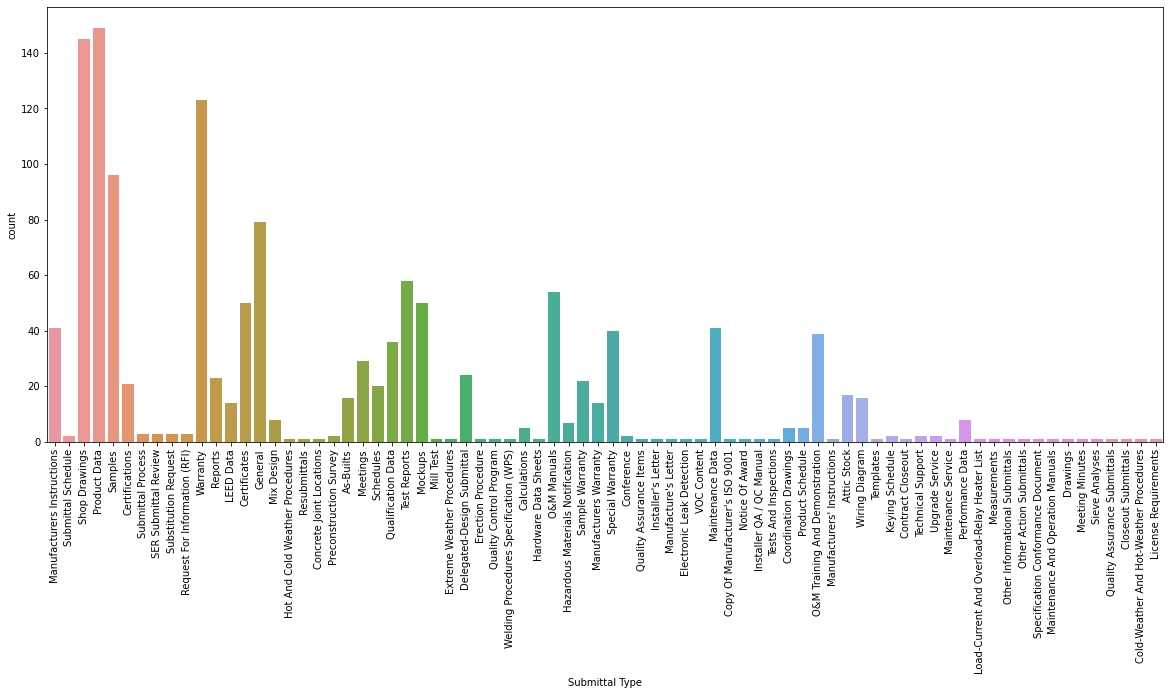

In [52]:
## Visualize count before filter
#
plt.figure(figsize = (20,8))
sns.countplot(data = dataset,
                x = 'Submittal Type')

plt.xticks(rotation = 90)
plt.show()

In [53]:
## Fitler Dataset
#
options = ['Attic Stock', 'Calculations', 'Certificates', 'Color', 'Chart Delivery', 'Leed Requirements', 'Maintenance Data' , 'Manufacturer/Installation Cert', \
            'Mix Design', 'Mockups', 'MSDS', 'Owner Training', 'Product Data', 'Pre-Install Meeting Minutes', 'Procedures', 'Qualifications', 'Record Drawing', \
            'Reports', 'Samples', 'Schedules', 'Shop Drawings', 'Test Data', 'Warranty', 'Certifications']


In [54]:
dataset = dataset[dataset['Submittal Type'].isin(options)]
dataset.head()

,Submittal Description,Submittal Type
2,Formwork Shop Drawings:\na. Submit for Record:...,Shop Drawings
3,Shoring/Reshoring Calculations: Submit for Rec...,Product Data
4,"Samples - At request of Architect, submit samp...",Samples
6,Asbestos and PCB Certification: Submit for rec...,Certifications
12,Form tie holes shall be filled as per approved...,Samples


In [55]:
## See the count
#
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 2 to 1313
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Submittal Description  748 non-null    object
 1   Submittal Type         748 non-null    object
dtypes: object(2)
memory usage: 17.5+ KB


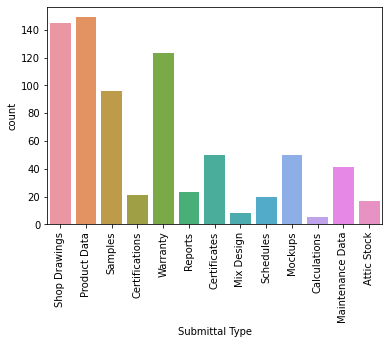

In [56]:
## Visualize count
#
sns.countplot(data = dataset,
                x = 'Submittal Type')

plt.xticks(rotation = 90)
plt.show()

### B. Encoding Feature

In [57]:

labelencoder = LabelEncoder()
dataset['Submittal Type'] = labelencoder.fit_transform(dataset['Submittal Type'])


In [58]:
dataset.head()

,Submittal Description,Submittal Type
2,Formwork Shop Drawings:\na. Submit for Record:...,11
3,Shoring/Reshoring Calculations: Submit for Rec...,7
4,"Samples - At request of Architect, submit samp...",9
6,Asbestos and PCB Certification: Submit for rec...,3
12,Form tie holes shall be filled as per approved...,9


### C. Matrix of Feature

In [59]:
X = dataset['Submittal Description']
Y = dataset['Submittal Type']

### D. Split Dataset

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### E. Vectorization Encoding

In [61]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train) 
X_test_tfidf = vectorizer.transform(X_test)

## Step 5 :  Model Training and Prediction

### A. Training

In [62]:
## Linear SVC
#
classifier = LinearSVC()
classifier.fit(X_train_tfidf, y_train)


LinearSVC()

### B. Prediction

In [63]:
## Prediction
#
predictions = classifier.predict(X_test_tfidf)

In [33]:
## Export Results
#
# result_dataframe = pd.DataFrame()
# result_dataframe['Test'] = X_test.tolist()
# result_dataframe['Original'] = labelencoder.inverse_transform(y_test.to_list())
# result_dataframe['Predicted'] = predictions.tolist()
# result_dataframe['Predicted_Label'] = labelencoder.inverse_transform(predictions)

# result_dataframe.to_excel("Result.xlsx")

### C. Accuracy

In [64]:
## Accuracy
#
print(metrics.accuracy_score(y_test, predictions))

0.9251336898395722


In [3]:
!jupyter nbconvert --to PDFviaHTML "type_classification_v1.ipynb"
# jupyter-nbconvert --to PDFviaHTML example.ipynb


[NbConvertApp] Converting notebook type_classification_v1.ipynb to PDFviaHTML
[NbConvertApp] Writing 409005 bytes to type_classification_v1.pdf
